In [1]:
import pandas as pd

## Carga de datos

### Órdenes de compra

In [2]:
orders_df = pd.read_parquet("/home/javier/devel-personal/tfm-data-ml-models/orders/data/70b9ff87-69de-4987-8f81-1a5cb8ad6322.parquet", engine="pyarrow")

In [3]:
orders_df.head()

,order_uuid,timestamp,country_code,is_new_user,with_discount,total
0,c90c2665-39c7-4cb4-9d30-6405fbb6cede,2023-04-01 10:00:00,BE,False,False,248.34
1,490a9d8a-4260-41fe-bb56-02787d251827,2023-04-01 11:00:00,IT,False,False,73.34
2,aa02d15c-bfd4-4a24-ade1-92f033f5bb9d,2023-04-01 11:00:00,FR,True,True,90.51
3,ac9d52d6-1f0e-4506-835d-1dd223b7e9fd,2023-04-02 16:00:00,AT,False,False,352.50
4,6c5b809c-f002-44e2-b85b-f29d5107324e,2023-04-02 16:00:00,ES,False,False,124.61


In [4]:
orders_df.describe()

,total
count,4854.000000
mean,134.001139
std,88.708771
min,1.890000
25%,60.672500
50%,123.225000
75%,190.955000
max,507.270000


### Líneas de órdenes de compra

In [5]:
order_lines_df = pd.read_parquet("/home/javier/devel-personal/tfm-data-ml-models/order_lines/data/98ab2aed-510c-434b-8b7f-6742996cbc27.parquet", engine="pyarrow")

In [6]:
order_lines_df.head()

,product_name,category,price,order_uuid,timestamp,order_line_uuid,amount,total
0,The hobbit: Illustrated Edition,books,21.49,b8bf4746-a2a0-4a7f-bed3-8933111de706,2023-04-01 07:00:00,b23641bb-9ce1-4aa3-80ab-8d89ac05de0f,3,64.47
1,Dog Treats Biscuits,pet_supplies,15.35,b8bf4746-a2a0-4a7f-bed3-8933111de706,2023-04-01 07:00:00,c5c2a045-806e-450b-98bf-0a912b7370d1,2,30.70
2,"Razor blades, 15 count",beauty_and_personal_care,31.97,b8bf4746-a2a0-4a7f-bed3-8933111de706,2023-04-01 07:00:00,450a3467-12da-4f83-b109-e773b2934624,2,63.94
3,Snacks Variety,grocery,9.99,aa02d15c-bfd4-4a24-ade1-92f033f5bb9d,2023-04-01 11:00:00,db1c9303-d045-47c2-9b2d-cadbfe52e568,2,19.98
4,Orange Juice,grocery,1.99,aa02d15c-bfd4-4a24-ade1-92f033f5bb9d,2023-04-01 11:00:00,94f9f5a3-6d22-4bae-acaa-09fa1e0ac48d,3,5.97


In [7]:
order_lines_df.describe()

,price,amount,total
count,16905.000000,16905.000000,16905.000000
mean,19.340980,2.001775,38.812380
std,13.216086,0.813034,32.626825
min,1.990000,1.000000,1.990000
25%,9.590000,1.000000,15.350000
50%,15.350000,2.000000,29.970000
75%,31.970000,3.000000,57.980000
max,49.990000,3.000000,149.970000


### Facturas

In [8]:
invoices_df = pd.read_parquet("/home/javier/devel-personal/tfm-data-ml-models/invoices/data/0c70cc22-de00-40d2-b624-37d95458e502.parquet", engine="pyarrow")

In [9]:
invoices_df.head()

,order_uuid,timestamp,total,status
0,b58c673e-cd2e-42bd-ba8e-b48b4e094c75,2023-04-02 13:00:00,80.32,PAID
1,585b52dd-375d-4bff-85f1-6a55303a1bc5,2023-04-01 16:00:00,272.17,PAID
2,15ff44a4-4be4-4d1e-8675-670725dfd6f0,2023-04-01 17:00:00,149.84,PENDING
3,73988e9f-e720-4c0c-b07f-81130a3b567d,2023-04-02 12:00:00,56.45,FAILED
4,47837083-bb61-46c3-92b9-6915148eba3b,2023-04-02 19:00:00,62.66,PAID


## Modelo predictivo de la evolución de las ventas

In [10]:
order_liness_grouped_df = order_lines_df.groupby("timestamp").count().reset_index()

In [11]:
order_liness_grouped_df

,timestamp,product_name,category,price,order_uuid,order_line_uuid,amount,total
0,2023-04-01 00:00:00,4,4,4,4,4,4,4
1,2023-04-01 01:00:00,3,3,3,3,3,3,3
2,2023-04-01 02:00:00,1,1,1,1,1,1,1
3,2023-04-01 03:00:00,1,1,1,1,1,1,1
4,2023-04-01 04:00:00,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
691,2023-04-29 19:00:00,49,49,49,49,49,49,49
692,2023-04-29 20:00:00,36,36,36,36,36,36,36
693,2023-04-29 21:00:00,16,16,16,16,16,16,16
694,2023-04-29 22:00:00,13,13,13,13,13,13,13


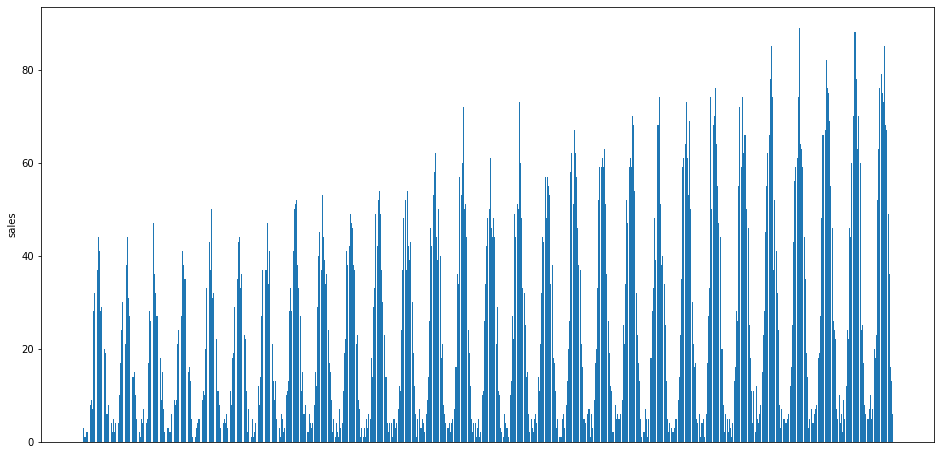

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.bar(order_liness_grouped_df[0:696]["timestamp"], order_liness_grouped_df[0:696]["total"])
plt.ylabel('sales')
plt.xticks([])
plt.show()

## Creación del conjunto de datos de entrenamiento y test

In [13]:
import numpy as np

order_lines_summary_df = order_liness_grouped_df["total"]

TRAIN_SIZE = 168
train, test = order_lines_summary_df.iloc[:556], order_lines_summary_df.iloc[556:696]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], 696))
train.shape, x_train.shape, test.shape, x_test.shape


((556,), (556,), (140,), (140,))

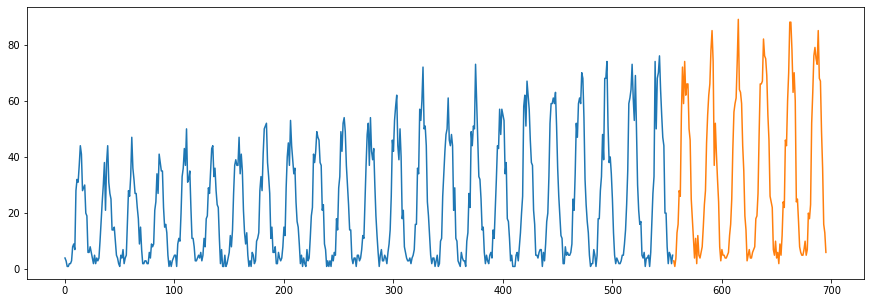

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

## Componentes de la serie temporal

### Heterocedasticidad

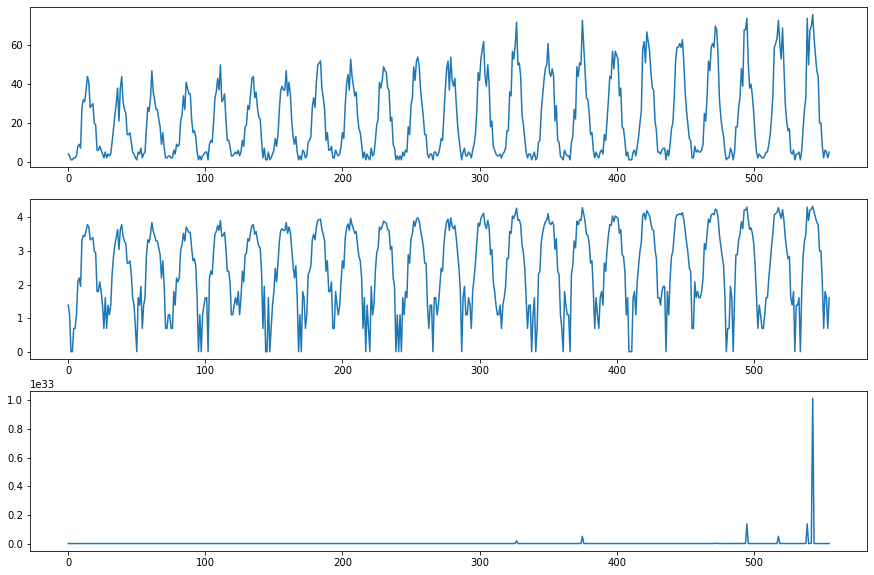

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
ax[0].plot(x_train, train)
ax[1].plot(x_train, np.log(train))
ax[2].plot(x_train, np.exp(train))

In [16]:
print("Desviación estándar del dataset:", train.describe())
print("Desviación estándar del dataset tras aplicar 'log':", np.log(train).describe())
print("Desviación estándar del dataset tras aplicar 'exp':", np.exp(train).describe())

Desviación estándar del dataset: count    556.000000
mean      21.798561
std       19.585959
min        1.000000
25%        5.000000
50%       15.000000
75%       37.000000
max       76.000000
Name: total, dtype: float64
Desviación estándar del dataset tras aplicar 'log': count    556.000000
mean       2.510462
std        1.210594
min        0.000000
25%        1.609438
50%        2.708050
75%        3.610918
max        4.330733
Name: total, dtype: float64
Desviación estándar del dataset tras aplicar 'exp': count    5.560000e+02
mean     2.547795e+30
std      4.389585e+31
min      2.718282e+00
25%      1.484132e+02
50%      3.269017e+06
75%      1.171914e+16
max      1.014800e+33
Name: total, dtype: float64


In [17]:
train_without_heteroscedasticity = np.log(train)
test_without_heteroscedasticity = np.log(test)

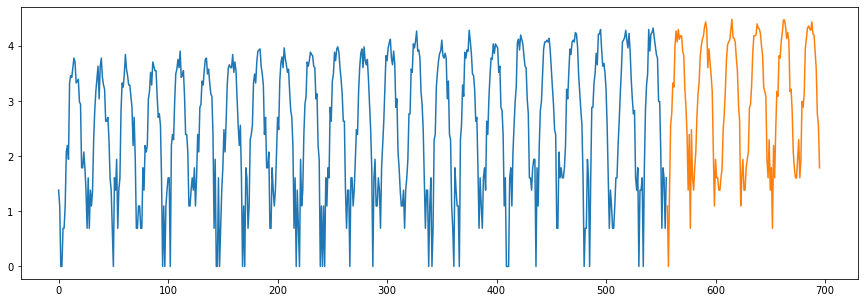

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_without_heteroscedasticity)
ax.plot(x_test, test_without_heteroscedasticity)

### Tendencia

In [19]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

linear_regression_model.fit(x_train.reshape(-1, 1), train_without_heteroscedasticity)
prediction = linear_regression_model.predict(x_train.reshape(-1, 1))

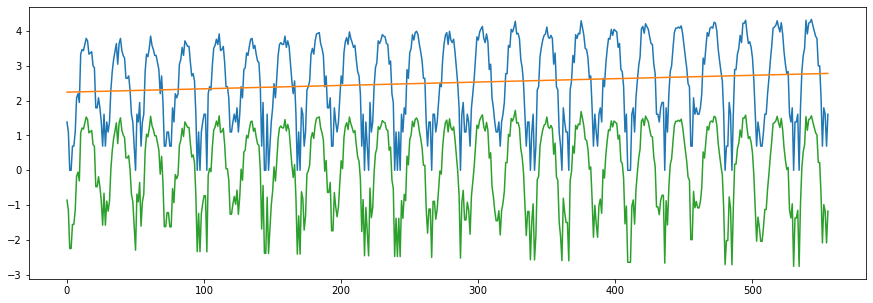

In [20]:
train_minus_tendency = [train_without_heteroscedasticity[i] - prediction[i] for i in range(len(prediction))]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_without_heteroscedasticity)
ax.plot(x_train, prediction)
ax.plot(x_train, train_minus_tendency)

In [21]:
test_linear_regression_model = LinearRegression()

test_linear_regression_model.fit(x_test.reshape(-1, 1), test_without_heteroscedasticity)
test_prediction = test_linear_regression_model.predict(x_test.reshape(-1, 1))

In [22]:
test_without_heteroscedasticity = test_without_heteroscedasticity.reset_index()

In [23]:
test_without_heteroscedasticity = test_without_heteroscedasticity["total"]

In [24]:
test_minus_tendency = [test_without_heteroscedasticity[i] - test_prediction[i] for i in range(len(test_prediction))]

### Estacionalidad

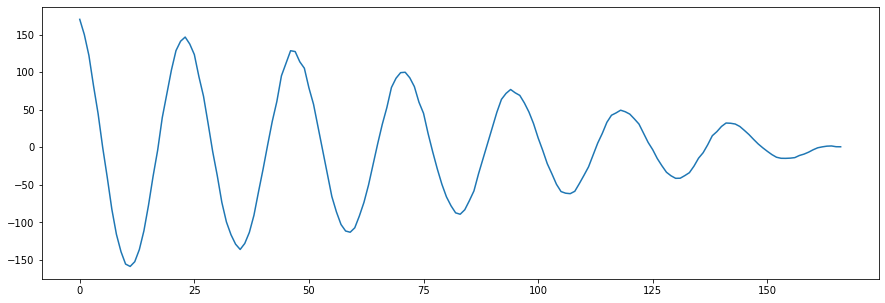

In [25]:
sample = train_minus_tendency[:168]

autocorrelation = np.correlate(sample, sample, mode="full")
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(range(167), autocorrelation[(len(autocorrelation)//2 + 1):])

### Entrenamiento de un modelo SARIMA

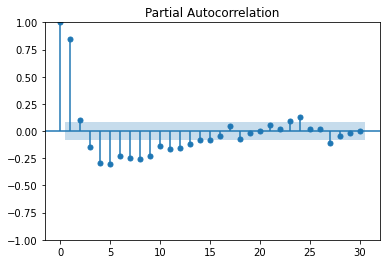

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(pd.Series(train_minus_tendency), lags=30)
plt.show()

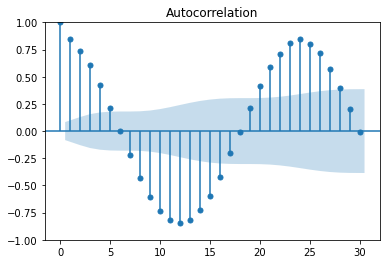

In [27]:
plot_acf(pd.Series(train_minus_tendency), lags=30)
plt.show()

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_minus_tendency, order=(2, 0, 5), seasonal_order=(1, 0, 5, 24))
res = sarima_model.fit(disp=False)
print(res.summary())

/home/javier/tools/anaconda3/envs/uoc20211pec1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/javier/tools/anaconda3/envs/uoc20211pec1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  556
Model:             SARIMAX(2, 0, 5)x(1, 0, 5, 24)   Log Likelihood                -304.828
Date:                            Sun, 11 Jun 2023   AIC                            637.656
Time:                                    19:14:22   BIC                            698.147
Sample:                                         0   HQIC                           661.284
                                            - 556                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9274      0.010    189.187      0.000       1.907       1.947
ar.L2         -0.9955      0.011   

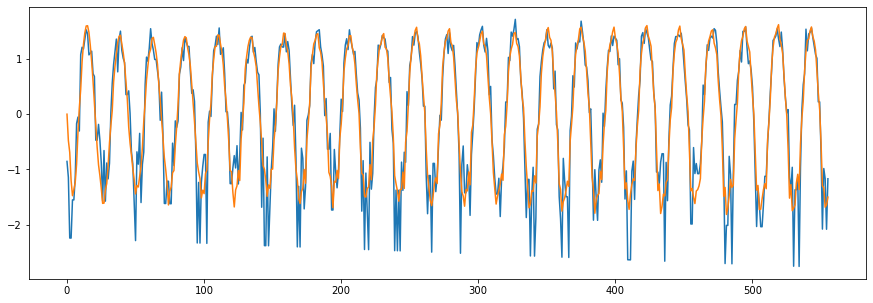

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_minus_tendency)
ax.plot(x_train, res.predict())

### Predicción con el conjunto de datos de test

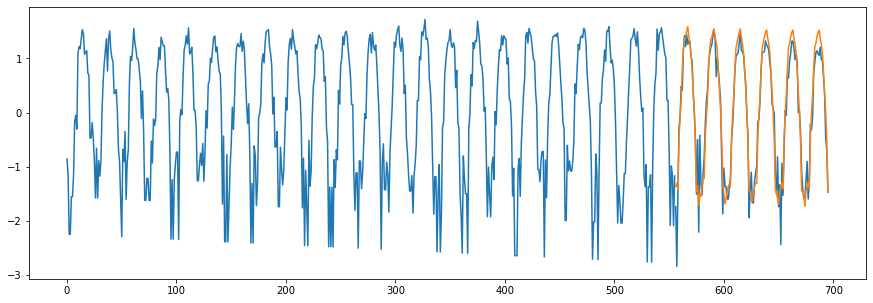

In [30]:
sarima_forecast = res.forecast(140)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_minus_tendency, color='C0')
ax.plot(x_test, test_minus_tendency, color='C0')
ax.plot(x_test, sarima_forecast, color='C1')

### Añadimos heterocedasticidad y tendencia a las predicciones del modelo SARIMA

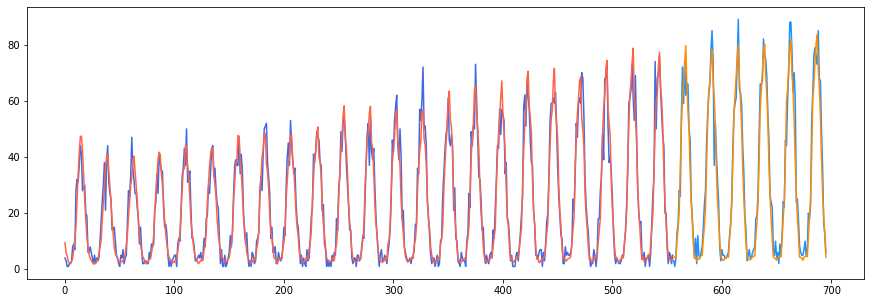

In [31]:
sarima_predictions = res.predict()
sarima_forecast = res.forecast(140)

linear_reg_intercept = linear_regression_model.intercept_
linear_reg_coefficient = linear_regression_model.coef_[0]

def calculate_value_with_trend(value, y):    
    return linear_reg_intercept + (linear_reg_coefficient * y) + value

def calculate_values_with_trend(values, y):
    values_with_trend = []
    
    for val in values:
        values_with_trend.append(calculate_value_with_trend(val, y))
        y+=1
        
    return (values_with_trend, y)

y = 0

predictions_with_trend, y = calculate_values_with_trend(sarima_predictions, y)
forecasted_with_trend, y = calculate_values_with_trend(sarima_forecast, y)
predictions_with_heteroscedasticity = np.exp(predictions_with_trend)
forecasted_with_heteroscedasticity = np.exp(forecasted_with_trend)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, color='royalblue')
ax.plot(x_test, test, color='dodgerblue')

ax.plot(x_train, predictions_with_heteroscedasticity, color='tomato')
ax.plot(x_test, forecasted_with_heteroscedasticity, color='darkorange')

## Modelo predictivo de productos en la cesta de la compra

In [32]:
import pycaret

In [33]:
from pycaret.arules import *

In [34]:
s = setup(data = order_lines_df, transaction_id = 'order_uuid', item_id = 'product_name')

Description,Value
session_id,7352
# Transactions,4854
# Items,40
Ignore Items,None


In [35]:
arules = create_model(metric='confidence', threshold=0.05, min_support=0.05)

In [36]:
arules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Premium Clumping Cat Litter),(Dog Treats Biscuits),0.1578,0.2940,0.1578,1.0000,3.4015,0.1114,inf
1,(Snacks Variety),(Orange Juice),0.1636,0.3041,0.1636,1.0000,3.2886,0.1138,inf
2,(The Lord of the Rings. 3 books),(The hobbit: Illustrated Edition),0.0820,0.1588,0.0820,1.0000,6.2957,0.0690,inf
3,(Orange Juice),(Snacks Variety),0.3041,0.1636,0.1636,0.5379,3.2886,0.1138,1.8102
4,(Dog Treats Biscuits),(Premium Clumping Cat Litter),0.2940,0.1578,0.1578,0.5368,3.4015,0.1114,1.8182
5,(The hobbit: Illustrated Edition),(The Lord of the Rings. 3 books),0.1588,0.0820,0.0820,0.5162,6.2957,0.0690,1.8975
6,(Dog Treats Biscuits),(Orange Juice),0.2940,0.3041,0.0849,0.2887,0.9495,-0.0045,0.9784
7,(Orange Juice),(Dog Treats Biscuits),0.3041,0.2940,0.0849,0.2791,0.9495,-0.0045,0.9794


## Modelo predictivo del estado de las facturas

In [37]:
enriched_invoices_df = invoices_df.join(orders_df.set_index("order_uuid"), on="order_uuid", how="inner", rsuffix="_order").drop(["total_order", "timestamp_order"], axis=1)

In [38]:
enriched_invoices_df

,order_uuid,timestamp,total,status,country_code,is_new_user,with_discount
0,b58c673e-cd2e-42bd-ba8e-b48b4e094c75,2023-04-02 13:00:00,80.32,PAID,DE,False,False
1,585b52dd-375d-4bff-85f1-6a55303a1bc5,2023-04-01 16:00:00,272.17,PAID,PT,True,True
2,15ff44a4-4be4-4d1e-8675-670725dfd6f0,2023-04-01 17:00:00,149.84,PENDING,DE,True,False
3,73988e9f-e720-4c0c-b07f-81130a3b567d,2023-04-02 12:00:00,56.45,FAILED,IT,True,False
4,47837083-bb61-46c3-92b9-6915148eba3b,2023-04-02 19:00:00,62.66,PAID,DE,False,False
...,...,...,...,...,...,...,...
4849,8065a14d-be74-4cc4-a360-4c4726ecf1c8,2023-04-29 13:00:00,65.66,PAID,BE,True,True
4850,67a33515-ff7f-469e-ab6d-2583a00e7f3a,2023-04-29 13:00:00,9.49,PAID,FR,False,True
4851,fdb9a1ac-8cc3-4934-926d-da38d6756abc,2023-04-25 10:00:00,267.08,PAID,ES,False,False
4852,3664fca7-f671-47e0-beb8-7f672c3b2f28,2023-04-25 10:00:00,198.54,PAID,ES,True,False


### Creamos variables "dummies" para las variables categóricas

In [39]:
enriched_invoices_df = pd.get_dummies(enriched_invoices_df, columns=["country_code"])

In [40]:
enriched_invoices_df

,order_uuid,timestamp,total,status,is_new_user,with_discount,country_code_AT,country_code_BE,country_code_DE,country_code_DK,country_code_ES,country_code_FI,country_code_FR,country_code_GR,country_code_IE,country_code_IT,country_code_LU,country_code_NL,country_code_PT,country_code_SE
0,b58c673e-cd2e-42bd-ba8e-b48b4e094c75,2023-04-02 13:00:00,80.32,PAID,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,585b52dd-375d-4bff-85f1-6a55303a1bc5,2023-04-01 16:00:00,272.17,PAID,True,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15ff44a4-4be4-4d1e-8675-670725dfd6f0,2023-04-01 17:00:00,149.84,PENDING,True,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,73988e9f-e720-4c0c-b07f-81130a3b567d,2023-04-02 12:00:00,56.45,FAILED,True,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,47837083-bb61-46c3-92b9-6915148eba3b,2023-04-02 19:00:00,62.66,PAID,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,8065a14d-be74-4cc4-a360-4c4726ecf1c8,2023-04-29 13:00:00,65.66,PAID,True,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4850,67a33515-ff7f-469e-ab6d-2583a00e7f3a,2023-04-29 13:00:00,9.49,PAID,False,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4851,fdb9a1ac-8cc3-4934-926d-da38d6756abc,2023-04-25 10:00:00,267.08,PAID,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4852,3664fca7-f671-47e0-beb8-7f672c3b2f28,2023-04-25 10:00:00,198.54,PAID,True,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Creación del conjunto de datos de entrenamiento y de test

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(enriched_invoices_df.drop(["status", "order_uuid", "timestamp"], axis=1), enriched_invoices_df["status"], random_state=0)

In [43]:
X_train

,total,is_new_user,with_discount,country_code_AT,country_code_BE,country_code_DE,country_code_DK,country_code_ES,country_code_FI,country_code_FR,country_code_GR,country_code_IE,country_code_IT,country_code_LU,country_code_NL,country_code_PT,country_code_SE
4642,28.99,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3054,9.99,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0
206,22.44,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0
384,142.14,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3941,168.81,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,347.00,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3264,92.10,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1653,96.79,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2607,80.32,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Entrenamiento de un árbol de decisión

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [45]:
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=3)
scores = cross_val_score(estimator=decision_tree, X=X_train, y=y_train, cv=5, n_jobs=4)

In [46]:
print("Scores: {}".format(scores))
print("Media de los scores: {}".format(scores.mean()))
print("Desviación estándard de los scores : {}".format(scores.std()))

Scores: [0.79532967 0.80357143 0.74862637 0.78571429 0.78983516]
Media de los scores: 0.7846153846153846
Desviación estándard de los scores : 0.018962015304107026


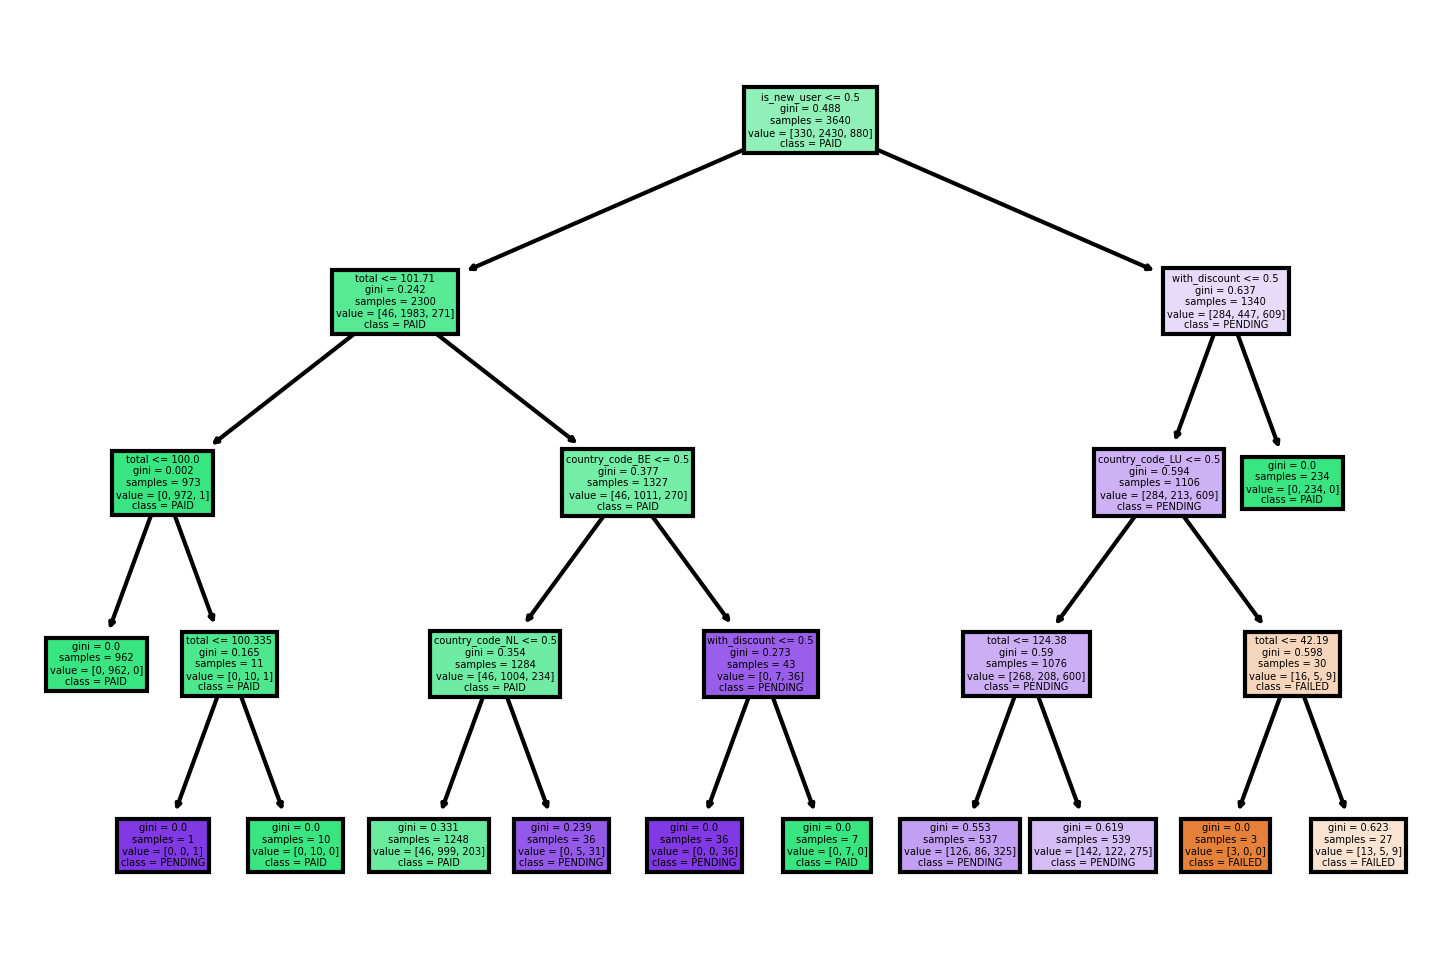

In [47]:
from sklearn import tree
decision_tree.fit(X_train, y_train)

plt.figure(dpi=300)
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=decision_tree.classes_, filled=True);

In [48]:
decision_tree.feature_importances_

array([0.08815333, 0.51560708, 0.29616044, 0.        , 0.04798574,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00611839, 0.04597502,
       0.        , 0.        ])

In [49]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

decision_tree_predictions = decision_tree.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, decision_tree_predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, decision_tree_predictions))
print("Classification report:", classification_report(y_test, decision_tree_predictions))

Accuracy: 0.7660626029654036
Confusion matrix:
 [[  1  14 109]
 [  1 717  68]
 [  4  88 212]]
Classification report:               precision    recall  f1-score   support

      FAILED       0.17      0.01      0.02       124
        PAID       0.88      0.91      0.89       786
     PENDING       0.54      0.70      0.61       304

    accuracy                           0.77      1214
   macro avg       0.53      0.54      0.51      1214
weighted avg       0.72      0.77      0.73      1214



### Entrenamiento de un modelo "Random Forest"

In [50]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, max_depth=3)

In [51]:
train_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print(train_scores)
print(train_scores.mean())
print(train_scores.std())

[0.67032967 0.6771978  0.73214286 0.66895604 0.79395604]
0.7085164835164834
0.04870779177494947


In [52]:
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, random_forest_predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, random_forest_predictions))
print("Classification report:", classification_report(y_test, random_forest_predictions))

Accuracy: 0.6960461285008237
Confusion matrix:
 [[  0  77  47]
 [  0 764  22]
 [  0 223  81]]
Classification report:               precision    recall  f1-score   support

      FAILED       0.00      0.00      0.00       124
        PAID       0.72      0.97      0.83       786
     PENDING       0.54      0.27      0.36       304

    accuracy                           0.70      1214
   macro avg       0.42      0.41      0.39      1214
weighted avg       0.60      0.70      0.62      1214



### Entrenamiento de un modelo "Gradient Boosting"

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=20, max_depth=3)

In [54]:
train_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5)
print(train_scores)
print(train_scores.mean())
print(train_scores.std())

[0.81318681 0.80357143 0.76648352 0.7967033  0.81730769]
0.7994505494505495
0.017993981201992082


In [55]:
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, gradient_boosting_predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, gradient_boosting_predictions))
print("Classification report:", classification_report(y_test, gradient_boosting_predictions))

Accuracy: 0.7792421746293245
Confusion matrix:
 [[  1  14 109]
 [  1 721  64]
 [  4  76 224]]
Classification report:               precision    recall  f1-score   support

      FAILED       0.17      0.01      0.02       124
        PAID       0.89      0.92      0.90       786
     PENDING       0.56      0.74      0.64       304

    accuracy                           0.78      1214
   macro avg       0.54      0.55      0.52      1214
weighted avg       0.73      0.78      0.75      1214

